In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
#reading data from excel file
url=r'dataset2\covid-data.csv'
covid=pd.read_csv(url)

In [3]:
#checking for rows and columns in table
covid.shape

(36347, 36)

In [4]:
#viewing first five entries
covid.head()


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [5]:
covid.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
36342,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36343,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36344,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36345,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36346,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#looking for no. of empty rows
covid.isnull().sum()

iso_code                              64
continent                            290
location                               0
date                                   0
total_cases                          345
new_cases                            345
total_deaths                         345
new_deaths                           345
total_cases_per_million              409
new_cases_per_million                409
total_deaths_per_million             409
new_deaths_per_million               409
new_tests                          25062
total_tests                        24710
total_tests_per_thousand           24710
new_tests_per_thousand             25062
new_tests_smoothed                 23654
new_tests_smoothed_per_thousand    23654
tests_per_case                     24506
positive_rate                      24157
tests_units                        22908
stringency_index                    6649
population                            64
population_density                  1661
median_age      

In [7]:
#looking date available of india
india_case=covid[covid['location']=='India']

In [11]:
#Desciption of categorical column inlude='O' is only describing string type column
covid.describe(include='O')

,iso_code,continent,location,date,tests_units
count,36283,36057,36347,36347,13439
unique,211,6,212,226,5
top,BRA,Europe,Mexico,2020-08-02,tests performed
freq,226,9833,226,211,7001


In [165]:
india_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15443,IND,Asia,India,2020-08-08,2088611.0,61537.0,42518.0,933.0,1513.481,44.592,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15444,IND,Asia,India,2020-08-09,2153010.0,64399.0,43379.0,861.0,1560.147,46.666,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15445,IND,Asia,India,2020-08-10,2215074.0,62064.0,44386.0,1007.0,1605.121,44.974,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15446,IND,Asia,India,2020-08-11,2268675.0,53601.0,45257.0,871.0,1643.962,38.841,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15447,IND,Asia,India,2020-08-12,2329638.0,60963.0,46091.0,834.0,1688.138,44.176,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


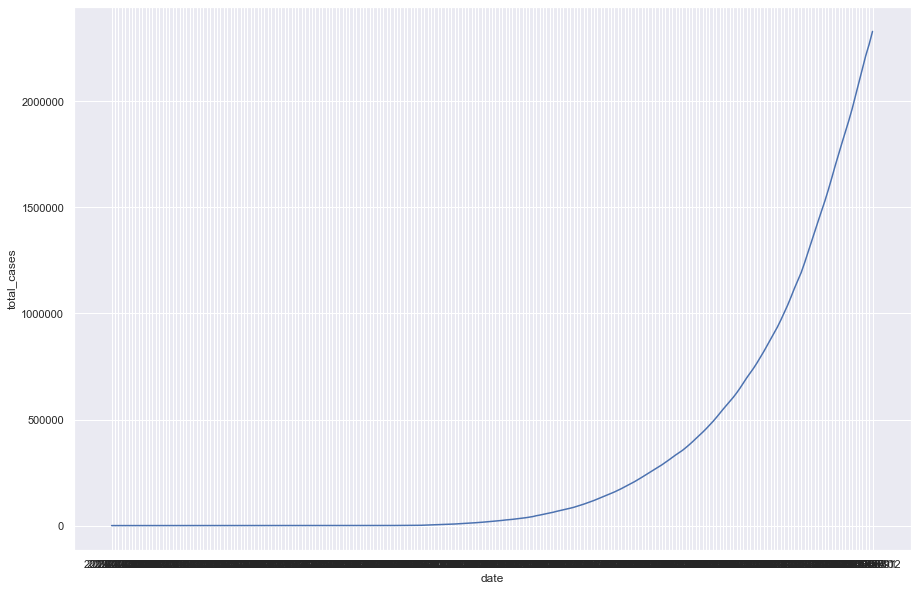

In [166]:
#
sb.set(rc={'figure.figsize':(15,10)})
sb.lineplot(x='date',y='total_cases',data=india_case)
plt.show()

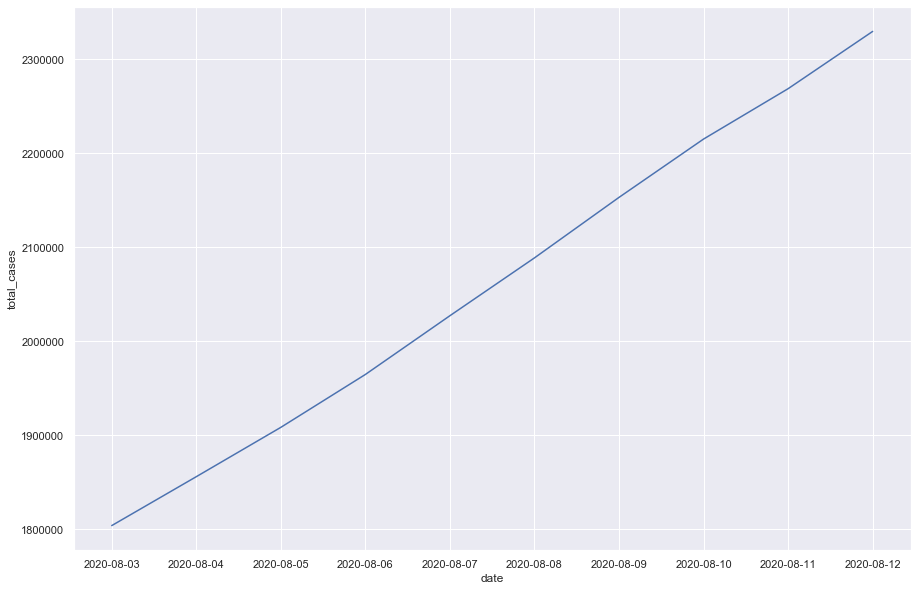

In [167]:
#getting last 10 days record of india
lastmonth_india=india_case.tail(10)
sb.lineplot(x='date',y='total_cases',data=lastmonth_india)
plt.show()

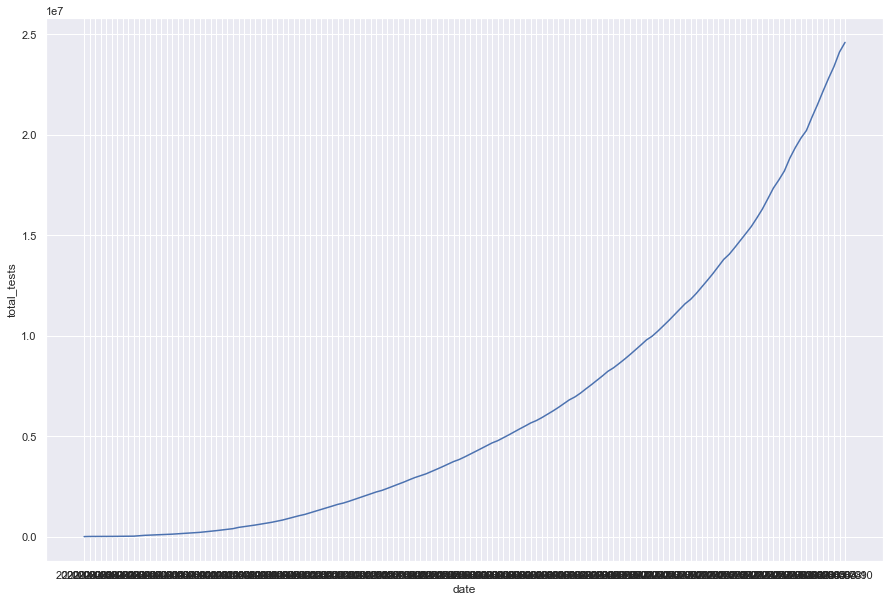

In [168]:
#Total tests per day India
sb.set(rc={'figure.figsize':(15,10)})
sb.lineplot(x='date',y='total_tests',data=india_case)
plt.show()

In [169]:
USA_case=covid[covid['iso_code']=='USA']
china_case=covid[covid['location']=='China']

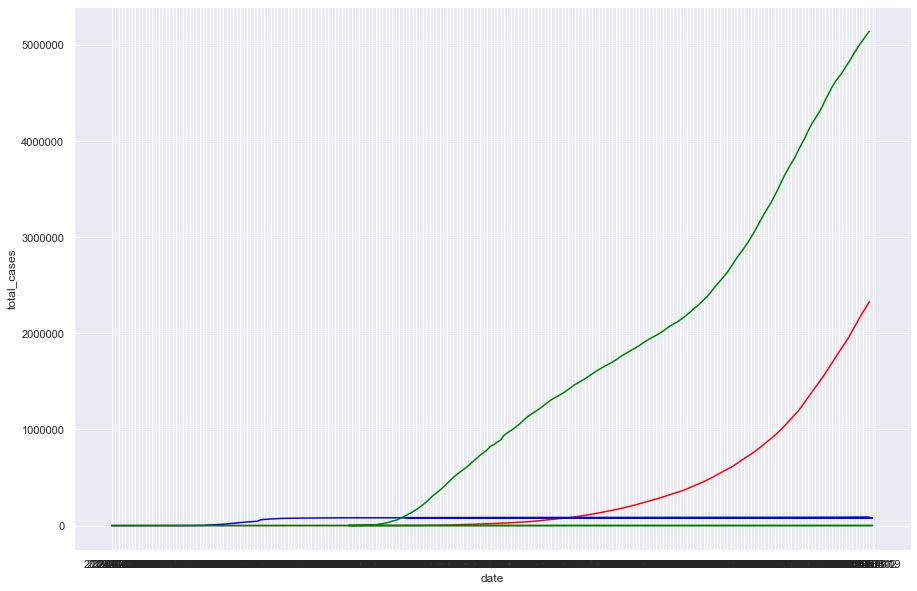

In [170]:
#India Vs China Vs USA , india=red, china=blue, green= USA
sb.lineplot(x='date',y='total_cases',data=india_case,color='red')
sb.lineplot(x='date',y='total_cases',data=china_case,color='blue')
sb.lineplot(x='date',y='total_cases',data=USA_case,color='green')
plt.show()

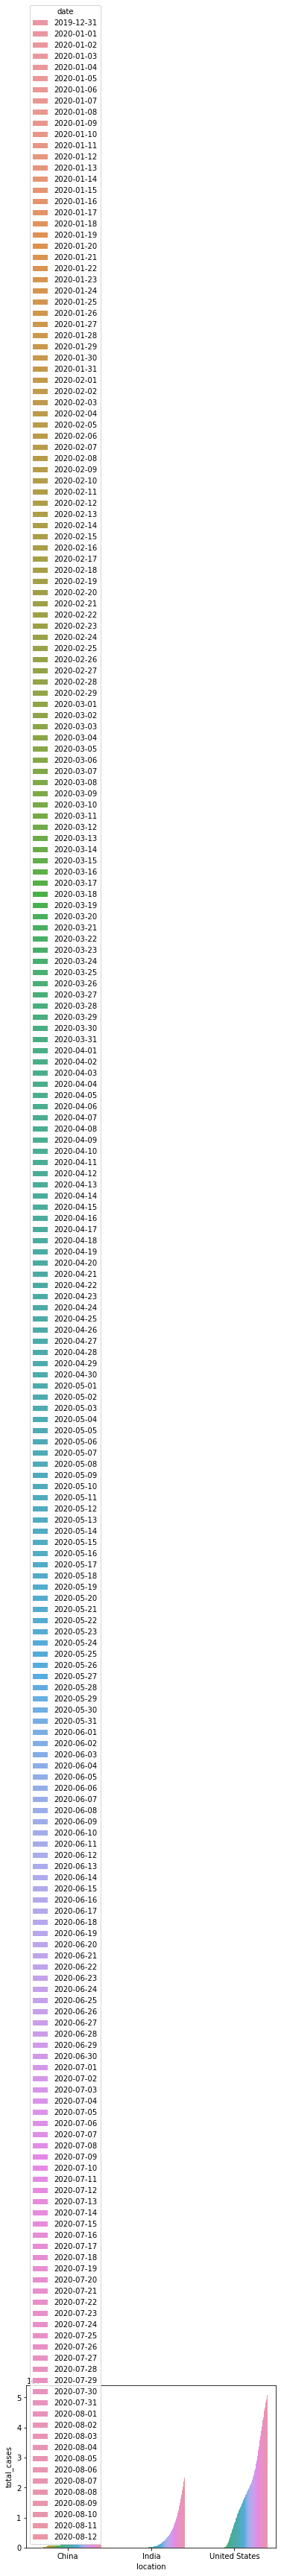

In [12]:
india_USA_china=covid[ (covid['iso_code']=='USA') | (covid['location']=='China') | (covid['location']=='India') ]
#sb.set(rc={'figure.figsize':(15,10)})
sb.barplot(x='location',y='total_cases',data=india_USA_china,hue='date')
plt.show()

In [172]:
last_day_cases=covid[covid['date']=='2020-08-12']
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
215,AFG,Asia,Afghanistan,2020-08-12,37269.0,215.0,1344.0,32.0,957.374,5.523,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83
372,ALB,Europe,Albania,2020-08-12,6676.0,140.0,205.0,5.0,2319.828,48.648,...,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57
593,DZA,Africa,Algeria,2020-08-12,36204.0,492.0,1322.0,10.0,825.613,11.220,...,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88
745,AND,Europe,Andorra,2020-08-12,963.0,0.0,52.0,0.0,12463.599,0.000,...,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73
889,AGO,Africa,Angola,2020-08-12,1679.0,7.0,78.0,3.0,51.086,0.213,...,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15
1028,AIA,North America,Anguilla,2020-08-12,3.0,0.0,0.0,0.0,199.973,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88
1174,ATG,North America,Antigua and Barbuda,2020-08-12,92.0,0.0,3.0,0.0,939.466,0.000,...,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.800,77.02
1358,ARG,South America,Argentina,2020-08-12,253855.0,7369.0,4785.0,151.0,5616.786,163.046,...,7.441,18933.907,0.6,191.032,5.50,16.200,27.700,NaN,5.000,76.67
1575,ARM,Asia,Armenia,2020-08-12,40593.0,160.0,803.0,7.0,13698.884,53.995,...,7.571,8787.580,1.8,341.010,7.11,1.500,52.100,94.043,4.200,75.09
1718,ABW,North America,Aruba,2020-08-12,717.0,87.0,3.0,0.0,6715.621,814.866,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [173]:
#Top 10 countries having maximum total cases
max_case_countries=last_day_cases.sort_values(by='total_cases',ascending=False)
max_case_countries.loc[:,['location','total_cases']].head(10)
#sb.barplot(x='location',y='total_cases',data=max_case_countries[:10],hue='location')
#plt.show()

,location,total_cases
36282,World,20330351.0
34561,United States,5141207.0
4913,Brazil,3109630.0
15447,India,2329638.0
27398,Russia,897599.0
30132,South Africa,566109.0
21694,Mexico,492522.0
26041,Peru,489680.0
7381,Colombia,410453.0
6994,Chile,376616.0


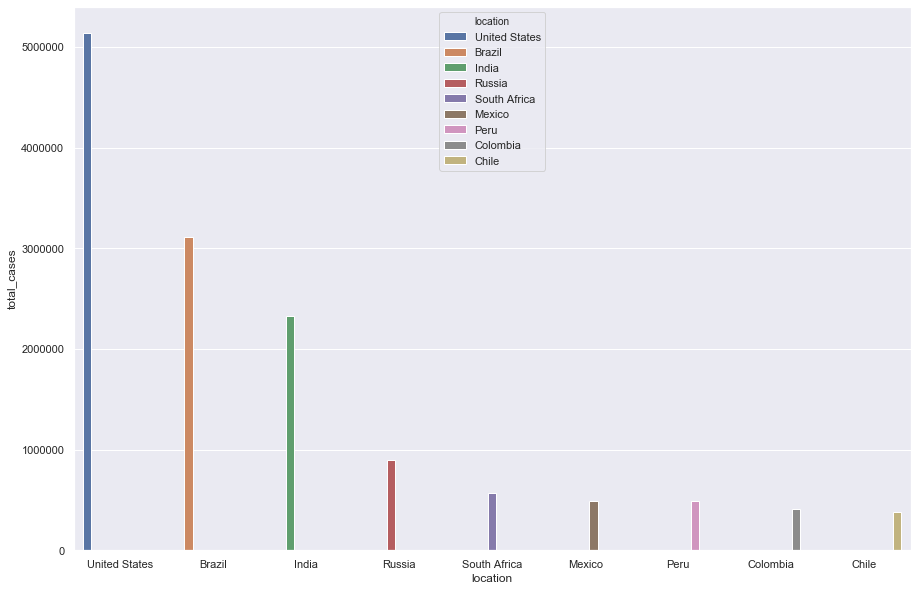

In [174]:
#Visualization of top 10 countries having maximum no of cases
sb.barplot(x='location',y='total_cases',data=max_case_countries[1:10],hue='location')
plt.show()

In [175]:
india_case.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15223,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15224,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15225,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15226,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15227,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [176]:
india_case['date']=pd.to_datetime(india_case['date'])
india_case['date']=india_case['date'].map(dt.datetime.toordinal)

C:\Users\adichouhanofficial\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\adichouhanofficial\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [177]:
india_case['stringency_index'].head()

15223    NaN
15224    0.0
15225    0.0
15226    0.0
15227    0.0
Name: stringency_index, dtype: float64

In [178]:
(india_case.isnull().sum()*100)/india_case.shape[0]

iso_code                            0.000000
continent                           0.000000
location                            0.000000
date                                0.000000
total_cases                         0.000000
new_cases                           0.000000
total_deaths                        0.000000
new_deaths                          0.000000
total_cases_per_million             0.000000
new_cases_per_million               0.000000
total_deaths_per_million            0.000000
new_deaths_per_million              0.000000
new_tests                          40.888889
total_tests                        38.222222
total_tests_per_thousand           38.222222
new_tests_per_thousand             40.888889
new_tests_smoothed                 36.000000
new_tests_smoothed_per_thousand    36.000000
tests_per_case                     36.000000
positive_rate                      36.000000
tests_units                        32.888889
stringency_index                    2.666667
population

In [179]:
india_case['stringency_index'].describe()

count    219.000000
mean      58.258082
std       36.439058
min        0.000000
25%       10.190000
50%       76.390000
75%       81.940000
max      100.000000
Name: stringency_index, dtype: float64

In [180]:
#imputing with stringency_index mean
india_case['stringency_index'].fillna(india_case['stringency_index'].mean(),inplace=True)

C:\Users\adichouhanofficial\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [181]:
#droping fields
india_case['tests_units']
india_case.drop(['tests_units','iso_code','continent','location'],axis=1,inplace=True)

C:\Users\adichouhanofficial\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [182]:
india_case.tail()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15443,737645,2088611.0,61537.0,42518.0,933.0,1513.481,44.592,30.810,0.676,598778.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15444,737646,2153010.0,64399.0,43379.0,861.0,1560.147,46.666,31.434,0.624,719364.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15445,737647,2215074.0,62064.0,44386.0,1007.0,1605.121,44.974,32.164,0.730,477023.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15446,737648,2268675.0,53601.0,45257.0,871.0,1643.962,38.841,32.795,0.631,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15447,737649,2329638.0,60963.0,46091.0,834.0,1688.138,44.176,33.399,0.604,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [188]:
india_case.isnull().sum()

date                           0
total_cases                    0
new_cases                      0
total_deaths                   0
new_deaths                     0
new_tests                     92
total_tests                   86
median_age                     0
aged_65_older                  0
aged_70_older                  0
cardiovasc_death_rate          0
diabetes_prevalence            0
female_smokers                 0
male_smokers                   0
handwashing_facilities         0
hospital_beds_per_thousand     0
life_expectancy                0
dtype: int64

In [189]:
#india_case.drop(['iso_code','continent','location'],axis=1,inplace=True)
#india_case.drop(['total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million'],axis=1,inplace=True)
#india_case.drop(['total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_per_case','positive_rate'],axis=1,inplace=True)
#india_case.drop(['population','population_density','gdp_per_capita','extreme_poverty'],axis=1,inplace=True)
#india_case.drop(['stringency_index'],axis=1,inplace=True)
#india_case.drop(['tests_units'],axis=1,inplace=True)


In [191]:
india_case['new_tests'].fillna(method='ffill' or 'bfill' , inplace=True)
india_case['total_tests'].fillna(method='ffill' or 'bfill' , inplace=True)


In [193]:
india_case['new_tests'].fillna(0, inplace=True)
india_case['total_tests'].fillna(0, inplace=True)


In [194]:
india_case.describe()

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,225.000000,2.250000e+02,225.000000,225.000000,225.000000,225.000000,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
mean,737536.693333,3.098122e+05,10353.946667,7603.977778,204.848889,113576.924444,4.143468e+06,2.820000e+01,5.989000e+00,3.414000e+00,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
std,65.465771,5.471773e+05,16757.036761,12115.987009,296.861837,160894.139642,6.357328e+06,1.139403e-13,1.602286e-14,9.791746e-15,7.975822e-13,2.314413e-14,6.676191e-15,1.424254e-14,1.993956e-13,8.901588e-16,1.139403e-13
min,737424.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.820000e+01,5.989000e+00,3.414000e+00,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
25%,737480.000000,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.820000e+01,5.989000e+00,3.414000e+00,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
50%,737537.000000,1.998400e+04,1396.000000,640.000000,43.000000,32167.000000,4.626210e+05,2.820000e+01,5.989000e+00,3.414000e+00,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
75%,737593.000000,3.540650e+05,11929.000000,11903.000000,357.000000,151808.000000,6.084256e+06,2.820000e+01,5.989000e+00,3.414000e+00,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
max,737649.000000,2.329638e+06,64399.000000,46091.000000,2003.000000,719364.000000,2.458356e+07,2.820000e+01,5.989000e+00,3.414000e+00,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01


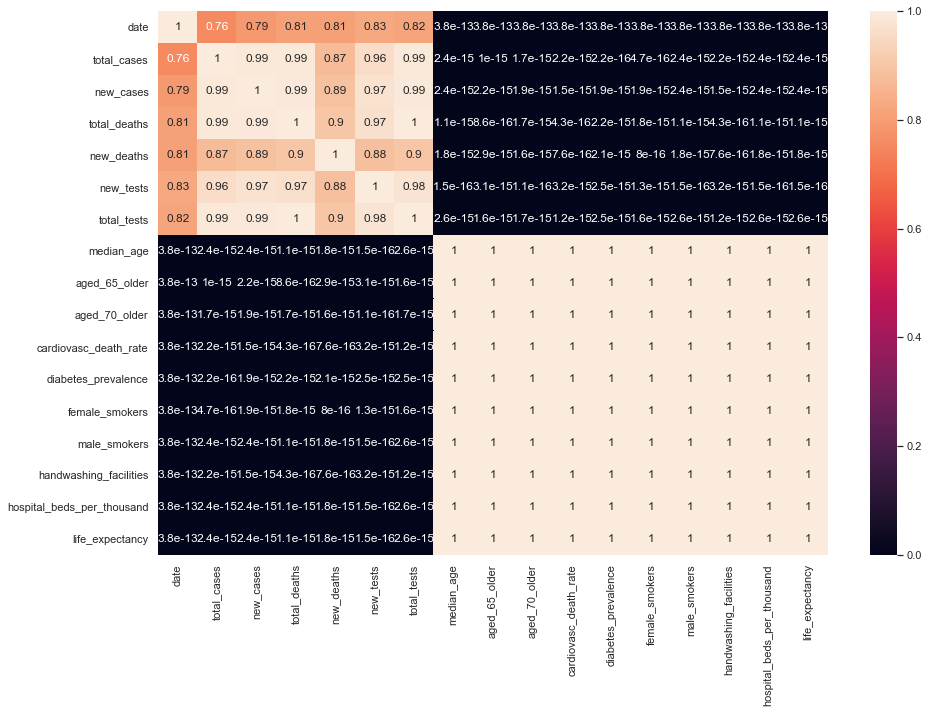

In [195]:
sb.heatmap(india_case.corr().abs(),annot=True)

sc=StandardScaler()
x=sc.fit_transform(india_case.iloc[:,:16])
y=sc.fit_transform(india_case.iloc[:,16:])

In [196]:
sc=StandardScaler()
india_case.to_csv('India_case.csv')

In [197]:
x=sc.fit_transform(india_case.iloc[:,0:1].values)
y=sc.fit_transform(india_case.iloc[:,1:2].values)

In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [199]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
lr.coef_

array([[0.81119309]])

In [201]:
lr.intercept_

array([0.05633201])

In [203]:
y_pred=lr.predict(x_test)

In [204]:
y1_pred=sc.inverse_transform(y_pred)
y1_test=sc.inverse_transform(y_test)

In [205]:
r2_score(y_test,y_pred)*100

2.0486502378601723

In [209]:
poly=PolynomialFeatures(degree=3)

In [210]:
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)
ro_2=LinearRegression()
ro_2.fit(x_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [211]:
y_pred_poly=ro_2.predict(x_poly_test)

In [213]:
r2_score(y_pred_poly,y_test)

0.975909875999799

In [215]:
ro_2.score(x_poly_train,y_train)

0.9878431493211576

In [216]:
mean_squared_error(y_test,y_pred_poly)

0.010389034898536733